# Self Attention 

In [1]:
import numpy as np
import math

In [2]:
L,d_k,d_v,d_q=4,8,8,8
q=np.random.randn(L, d_q)
k=np.random.randn(L, d_k)
v=np.random.randn(L, d_v)

In [4]:
print("Query\n",q)
print("Key\n",k)
print("Value\n",v)

Query
 [[-0.64701818 -0.0558079  -1.14771189  0.49863223 -1.88128067  1.25783586
   0.04549632 -0.29669845]
 [ 0.93365342  1.20111119 -0.88908306 -0.50505876 -0.06488743 -0.87293153
  -0.9846306  -0.18188075]
 [ 0.18629219 -0.96036127  0.70557281  0.2958023  -0.33001171  0.94506385
  -0.13190045  0.28534063]
 [-0.60255302  1.45869212 -0.63609783 -0.28848135 -0.47130473 -1.36020655
  -0.78698731 -0.68169012]]
Key
 [[-0.24554501 -0.65990683  2.15165207 -0.94649725  0.72228101 -0.02113326
  -0.98827148 -0.24726241]
 [ 0.6892279   0.59099566  1.32857133 -0.22630307 -0.1476044  -0.60683591
  -0.02796739 -1.32775192]
 [-1.07703429 -0.378611    1.73588861  0.29028997 -0.74374386 -0.05225929
   2.00015962 -0.16328197]
 [ 0.38265766 -0.63299722 -1.49036348  0.01767426  1.30787406 -0.26752549
   1.10496892 -0.62999402]]
Value
 [[-0.6714164  -0.26395483 -0.94671032  1.02257215 -0.31060232 -0.1417706
  -0.74010142 -2.35063822]
 [-0.89597015  0.72128891 -0.37797554 -0.49751407 -0.75425701  1.553826

In [6]:
np.matmul(q, k.T)

array([[-4.10272639, -2.20952946,  0.34334095, -1.05273045],
       [-1.46720055,  1.09477152, -4.9961354 ,  0.0883644 ],
       [ 1.62764295, -0.46866889,  1.3592674 , -1.37709094],
       [-1.27561681,  1.48908142, -2.13242393, -0.90365444]])

In [9]:
q.var(), k.var(), np.matmul(q, k.T).var()

(0.6248391862466455, 0.858228453721279, 3.428832799627412)

In [11]:
scaled = np.matmul(q, k.T)/math.sqrt(d_k)
q.var(), k.var(), scaled.var()

(0.6248391862466455, 0.858228453721279, 0.4286040999534264)

In [13]:
scaled

array([[-1.45053283, -0.78118663,  0.12138936, -0.37219642],
       [-0.51873373,  0.38706018, -1.76640061,  0.03124153],
       [ 0.57545868, -0.16569948,  0.4805736 , -0.48687517],
       [-0.45099865,  0.52646978, -0.75392571, -0.31949009]])

In [16]:
mask = np.tril((np.ones((L,L))))
mask

array([[1., 0., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 1., 0.],
       [1., 1., 1., 1.]])

In [17]:
mask[mask==0]=-np.infty
mask[mask==1]=0

In [18]:
mask

array([[  0., -inf, -inf, -inf],
       [  0.,   0., -inf, -inf],
       [  0.,   0.,   0., -inf],
       [  0.,   0.,   0.,   0.]])

In [19]:
scaled+mask

array([[-1.45053283,        -inf,        -inf,        -inf],
       [-0.51873373,  0.38706018,        -inf,        -inf],
       [ 0.57545868, -0.16569948,  0.4805736 ,        -inf],
       [-0.45099865,  0.52646978, -0.75392571, -0.31949009]])

In [23]:
def softmax(x):
    return (np.exp(x).T/np.sum(np.exp(x),axis=-1)).T

In [24]:
attention = softmax(scaled+mask)

In [25]:
attention

array([[1.        , 0.        , 0.        , 0.        ],
       [0.2878613 , 0.7121387 , 0.        , 0.        ],
       [0.41910462, 0.19972919, 0.38116619, 0.        ],
       [0.18060582, 0.47999961, 0.13340502, 0.20598955]])

In [26]:
new_v =  np.matmul(attention, v)
new_v

array([[-0.6714164 , -0.26395483, -0.94671032,  1.02257215, -0.31060232,
        -0.1417706 , -0.74010142, -2.35063822],
       [-0.83132982,  0.43767536, -0.54169228, -0.05994007, -0.62654599,
         1.06572945, -0.13466083, -2.50117936],
       [ 0.16440296, -0.15601284, -0.01566879,  0.60630087,  0.09608288,
         0.87219026,  0.10601222, -0.84724495],
       [-0.0041179 ,  0.11156567, -0.01644406, -0.07393756, -0.23945641,
         1.30584347, -0.1672929 , -1.56422819]])

In [27]:
v

array([[-0.6714164 , -0.26395483, -0.94671032,  1.02257215, -0.31060232,
        -0.1417706 , -0.74010142, -2.35063822],
       [-0.89597015,  0.72128891, -0.37797554, -0.49751407, -0.75425701,
         1.55382614,  0.11007087, -2.56203123],
       [ 1.63904376, -0.49702886,  1.19788858,  0.72699062,  0.98882034,
         1.62989935,  1.03421495,  1.7043243 ],
       [ 1.5949958 , -0.58582972,  0.85519434, -0.56700781,  0.22704864,
         1.78734974, -1.08951998, -0.66644487]])

# Multi Head Attention

In [29]:
!pip install torch torchvision torchaudio

Defaulting to user installation because normal site-packages is not writeable


In [31]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

In [34]:
sequence_length=4
batch_size=1
input_dim=512
d_model=512 #output of attention model for every single word
x = torch.randn( (batch_size,sequence_length,input_dim) ) #sample input we get after as output from attention model

In [35]:
x.size()

torch.Size([1, 4, 512])

In [36]:
qkv_layer=nn.Linear(input_dim, 3*d_model)

In [37]:
qkv=qkv_layer(x)

In [38]:
qkv.shape

torch.Size([1, 4, 1536])

Text(0.5, 1.0, 'qkv distribution')

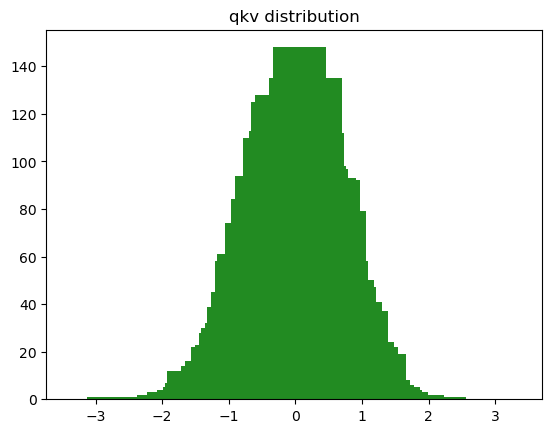

In [39]:
import matplotlib.pyplot as plt
y_val = torch.histc(qkv, bins=200, min=-3, max=3)
x_val = np.arange(-1,1,0.01)*3
plt.bar(x_val,y_val,align='center',color=['forestgreen'])
plt.title('qkv distribution')

In [40]:
num_heads = 8
head_dim=d_model//num_heads
qkv = qkv.reshape(batch_size,sequence_length,num_heads,3*head_dim)

In [41]:
qkv.shape

torch.Size([1, 4, 8, 192])

In [42]:
qkv = qkv.permute(0,2,1,3)
qkv.shape

torch.Size([1, 8, 4, 192])

In [43]:
q, k ,v = qkv.chunk(3,dim=-1)
q.shape,k.shape,v.shape

(torch.Size([1, 8, 4, 64]),
 torch.Size([1, 8, 4, 64]),
 torch.Size([1, 8, 4, 64]))

In [45]:
d_k = q.size()[-1]
scaled = torch.matmul(q,k.transpose(-2,-1))/math.sqrt(d_k)
scaled.shape

torch.Size([1, 8, 4, 4])

In [46]:
k.T.shape

C:\Users\Ayush\AppData\Local\Temp\ipykernel_17116\3717780648.py:1: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ..\aten\src\ATen\native\TensorShape.cpp:3575.)
  k.T.shape


torch.Size([64, 4, 8, 1])

In [47]:
mask =torch.full(scaled.size(),float('-inf'))
mask = torch.triu(mask, diagonal=1)
mask[0][1]

tensor([[0., -inf, -inf, -inf],
        [0., 0., -inf, -inf],
        [0., 0., 0., -inf],
        [0., 0., 0., 0.]])

In [50]:
(scaled + mask)

tensor([[[[-0.3911,    -inf,    -inf,    -inf],
          [ 0.0577, -0.4869,    -inf,    -inf],
          [-0.5566, -0.5639, -0.1631,    -inf],
          [-0.0058,  0.2288,  0.4268,  0.0592]],

         [[ 0.0572,    -inf,    -inf,    -inf],
          [ 0.0606,  0.3213,    -inf,    -inf],
          [-0.0271, -0.2859, -0.3119,    -inf],
          [ 0.2995,  0.2023,  0.0307,  0.2783]],

         [[-0.1047,    -inf,    -inf,    -inf],
          [ 0.2869,  0.5947,    -inf,    -inf],
          [ 0.4800, -0.3883,  0.2293,    -inf],
          [-0.3642, -0.4278,  0.0478, -0.5409]],

         [[ 0.0629,    -inf,    -inf,    -inf],
          [ 0.1743,  0.5814,    -inf,    -inf],
          [ 0.3219,  0.1106, -0.2197,    -inf],
          [-0.2296, -0.1188,  0.2800, -0.3095]],

         [[ 0.4911,    -inf,    -inf,    -inf],
          [ 0.1320,  0.6294,    -inf,    -inf],
          [-0.1384, -0.1401,  0.0785,    -inf],
          [ 0.3381, -0.0686,  0.3475, -0.0621]],

         [[ 0.2449,    -inf,  

In [51]:
scaled+=mask

In [55]:
scaled.shape

torch.Size([1, 8, 4, 4])

In [52]:
 attention = F.softmax(scaled, dim=-1)

In [53]:
attention.shape

torch.Size([1, 8, 4, 4])

In [54]:
attention[0][0]

tensor([[1.0000, 0.0000, 0.0000, 0.0000],
        [0.6329, 0.3671, 0.0000, 0.0000],
        [0.2878, 0.2857, 0.4265, 0.0000],
        [0.2052, 0.2595, 0.3163, 0.2190]], grad_fn=<SelectBackward0>)

In [56]:
values = torch.matmul(attention,v)
values.shape

torch.Size([1, 8, 4, 64])

In [57]:
import math

def scaled_dot_product(q, k, v, mask=None):
    d_k = q.size()[-1]
    scaled = torch.matmul(q, k.transpose(-1, -2)) / math.sqrt(d_k)
    if mask is not None:
        scaled += mask
    attention = F.softmax(scaled, dim=-1)
    values = torch.matmul(attention, v)
    return values, attention

In [58]:
values, attention = scaled_dot_product(q, k, v, mask=mask)

In [59]:
attention.shape

torch.Size([1, 8, 4, 4])

In [60]:
attention[0][0]

tensor([[1.0000, 0.0000, 0.0000, 0.0000],
        [0.6329, 0.3671, 0.0000, 0.0000],
        [0.2878, 0.2857, 0.4265, 0.0000],
        [0.2052, 0.2595, 0.3163, 0.2190]], grad_fn=<SelectBackward0>)

In [61]:
values.size()

torch.Size([1, 8, 4, 64])

In [63]:
values=values.reshape(batch_size,sequence_length,num_heads*head_dim)
values.size()

torch.Size([1, 4, 512])

In [64]:
linear_layer = nn.Linear(d_model,d_model)

In [65]:
d_model

512

In [66]:
out=linear_layer(values)

In [67]:
out.shape

torch.Size([1, 4, 512])

In [69]:
def scaled_dot_product(q, k, v, mask=None):
    d_k = q.size()[-1]
    scaled = torch.matmul(q, k.transpose(-1, -2)) / math.sqrt(d_k)
    if mask is not None:
        scaled += mask
    attention = F.softmax(scaled, dim=-1)
    values = torch.matmul(attention, v)
    return values, attention
class MultiheadAttention(nn.Module):
    def __init__(self, input_dim, d_model, num_heads):
        super().__init__()
        self.input_dim=input_dim
        self.d_model=d_model
        self.num_heads=num_heads
        self.head_dim=d_model//num_heads
        self.qkv_layer=nn.Linear(input_dim,3*d_model)
        self.linear_layer=nn.Linear(d_model,d_model)
    def forward(self,x,mask=None):
        batch_size, sequence_length, input_dim = x.size()
        print(f"x.size(): {x.size()}")
        qkv = self.qkv_layer(x)
        print(f"qkv.size(): {qkv.size()}")
        qkv = qkv.reshape(batch_size, sequence_length, self.num_heads, 3 * self.head_dim)
        print(f"qkv.size(): {qkv.size()}")
        qkv = qkv.permute(0, 2, 1, 3)
        print(f"qkv.size(): {qkv.size()}")
        q, k, v = qkv.chunk(3, dim=-1)
        print(f"q size: {q.size()}, k size: {k.size()}, v size: {v.size()}, ")
        values, attention = scaled_dot_product(q, k, v, mask)
        print(f"values.size(): {values.size()}, attention.size:{ attention.size()} ")
        values = values.reshape(batch_size, sequence_length, self.num_heads * self.head_dim)
        print(f"values.size(): {values.size()}")
        out = self.linear_layer(values)
        print(f"out.size(): {out.size()}")
        return out

In [70]:
input_dim=1024
d_model=512
num_heads=8
batch_size=30
sequence_length=5
x = torch.randn((batch_size,sequence_length, input_dim))
model = MultiheadAttention(input_dim, d_model, num_heads)
out = model.forward(x)

x.size(): torch.Size([30, 5, 1024])
qkv.size(): torch.Size([30, 5, 1536])
qkv.size(): torch.Size([30, 5, 8, 192])
qkv.size(): torch.Size([30, 8, 5, 192])
q size: torch.Size([30, 8, 5, 64]), k size: torch.Size([30, 8, 5, 64]), v size: torch.Size([30, 8, 5, 64]), 
values.size(): torch.Size([30, 8, 5, 64]), attention.size:torch.Size([30, 8, 5, 5]) 
values.size(): torch.Size([30, 5, 512])
out.size(): torch.Size([30, 5, 512])


# Positional Encoding

In [83]:
import torch
import torch.nn as nn

In [84]:
max_seq_len=10
d_model=6

In [85]:
even_i = torch.arange(0,d_model,2).float()
even_i

tensor([0., 2., 4.])

In [86]:
even_denominator=torch.pow(1000,even_i/d_model)
even_denominator

tensor([  1.0000,  10.0000, 100.0000])

In [87]:
odd_i = torch.arange(1,d_model,2).float()
odd_i

tensor([1., 3., 5.])

In [88]:
odd_denominator=torch.pow(1000,(odd_i-1)/d_model)
odd_denominator

tensor([  1.0000,  10.0000, 100.0000])

In [89]:
denominator = even_denominator

In [98]:
denominator.shape

torch.Size([3])

In [91]:
position = torch.arange(max_seq_len, dtype=torch.float).reshape(max_seq_len,1)

In [92]:
position

tensor([[0.],
        [1.],
        [2.],
        [3.],
        [4.],
        [5.],
        [6.],
        [7.],
        [8.],
        [9.]])

In [93]:
even_PE=torch.sin(position/denominator)
odd_PE=torch.cos(position/denominator)

In [94]:
even_PE

tensor([[ 0.0000,  0.0000,  0.0000],
        [ 0.8415,  0.0998,  0.0100],
        [ 0.9093,  0.1987,  0.0200],
        [ 0.1411,  0.2955,  0.0300],
        [-0.7568,  0.3894,  0.0400],
        [-0.9589,  0.4794,  0.0500],
        [-0.2794,  0.5646,  0.0600],
        [ 0.6570,  0.6442,  0.0699],
        [ 0.9894,  0.7174,  0.0799],
        [ 0.4121,  0.7833,  0.0899]])

In [95]:
even_PE.shape

torch.Size([10, 3])

In [96]:
odd_PE

tensor([[ 1.0000,  1.0000,  1.0000],
        [ 0.5403,  0.9950,  0.9999],
        [-0.4161,  0.9801,  0.9998],
        [-0.9900,  0.9553,  0.9996],
        [-0.6536,  0.9211,  0.9992],
        [ 0.2837,  0.8776,  0.9988],
        [ 0.9602,  0.8253,  0.9982],
        [ 0.7539,  0.7648,  0.9976],
        [-0.1455,  0.6967,  0.9968],
        [-0.9111,  0.6216,  0.9960]])

In [97]:
odd_PE.shape

torch.Size([10, 3])

In [99]:
stacked =torch.stack([even_PE, odd_PE],dim=2)
stacked.shape

torch.Size([10, 3, 2])

In [102]:
PE = torch.flatten(stacked, start_dim=1,end_dim=2)
PE

tensor([[ 0.0000,  1.0000,  0.0000,  1.0000,  0.0000,  1.0000],
        [ 0.8415,  0.5403,  0.0998,  0.9950,  0.0100,  0.9999],
        [ 0.9093, -0.4161,  0.1987,  0.9801,  0.0200,  0.9998],
        [ 0.1411, -0.9900,  0.2955,  0.9553,  0.0300,  0.9996],
        [-0.7568, -0.6536,  0.3894,  0.9211,  0.0400,  0.9992],
        [-0.9589,  0.2837,  0.4794,  0.8776,  0.0500,  0.9988],
        [-0.2794,  0.9602,  0.5646,  0.8253,  0.0600,  0.9982],
        [ 0.6570,  0.7539,  0.6442,  0.7648,  0.0699,  0.9976],
        [ 0.9894, -0.1455,  0.7174,  0.6967,  0.0799,  0.9968],
        [ 0.4121, -0.9111,  0.7833,  0.6216,  0.0899,  0.9960]])

In [103]:
import torch
import torch.nn as nn

class PositionalEncoding(nn.Module):

    def __init__(self, d_model, max_sequence_length):
        super().__init__()
        self.max_sequence_length = max_sequence_length
        self.d_model = d_model

    def forward(self):
        even_i = torch.arange(0, self.d_model, 2).float()
        denominator = torch.pow(10000, even_i/self.d_model)
        position = torch.arange(self.max_sequence_length).reshape(self.max_sequence_length, 1)
        even_PE = torch.sin(position / denominator)
        odd_PE = torch.cos(position / denominator)
        stacked = torch.stack([even_PE, odd_PE], dim=2)
        PE = torch.flatten(stacked, start_dim=1, end_dim=2)
        return PE

In [104]:
pe = PositionalEncoding(d_model=6, max_sequence_length=10)
pe.forward()
     

tensor([[ 0.0000,  1.0000,  0.0000,  1.0000,  0.0000,  1.0000],
        [ 0.8415,  0.5403,  0.0464,  0.9989,  0.0022,  1.0000],
        [ 0.9093, -0.4161,  0.0927,  0.9957,  0.0043,  1.0000],
        [ 0.1411, -0.9900,  0.1388,  0.9903,  0.0065,  1.0000],
        [-0.7568, -0.6536,  0.1846,  0.9828,  0.0086,  1.0000],
        [-0.9589,  0.2837,  0.2300,  0.9732,  0.0108,  0.9999],
        [-0.2794,  0.9602,  0.2749,  0.9615,  0.0129,  0.9999],
        [ 0.6570,  0.7539,  0.3192,  0.9477,  0.0151,  0.9999],
        [ 0.9894, -0.1455,  0.3629,  0.9318,  0.0172,  0.9999],
        [ 0.4121, -0.9111,  0.4057,  0.9140,  0.0194,  0.9998]])

# Layer Normalization

In [105]:
import torch
from torch import nn

In [107]:
inputs = torch.Tensor([[[0.2,0.1,0.3],[0.5,0.1,0.1]]])
B, S, E = inputs.size()
inputs = inputs.reshape(S, B, E)
inputs.size()

torch.Size([2, 1, 3])

In [108]:
parameter_shape = inputs.size()[-2:]
gamma = nn.Parameter(torch.ones(parameter_shape))
beta = nn.Parameter(torch.zeros(parameter_shape))

In [109]:
gamma.size(),beta.size()

(torch.Size([1, 3]), torch.Size([1, 3]))

In [110]:
dims = [-(i+1) for i in range(len(parameter_shape))] #computing dim. for which we want to compute layer norm.

In [111]:
dims

[-1, -2]

In [112]:
mean = inputs.mean(dim=dims,keepdim=True)
mean.size()

torch.Size([2, 1, 1])

In [113]:
var = ((inputs-mean)**2).mean(dim=dims,keepdim=True)
epsilon=1e-5
std = (var+epsilon).sqrt()
std

tensor([[[0.0817]],

        [[0.1886]]])

In [114]:
y=(inputs-mean)/std
y

tensor([[[ 0.0000, -1.2238,  1.2238]],

        [[ 1.4140, -0.7070, -0.7070]]])

In [115]:
out=gamma*y+beta

In [116]:
out

tensor([[[ 0.0000, -1.2238,  1.2238]],

        [[ 1.4140, -0.7070, -0.7070]]], grad_fn=<AddBackward0>)

In [117]:
import torch
from torch import nn

class LayerNormalization():
    def __init__(self, parameters_shape, eps=1e-5):
        self.parameters_shape=parameters_shape
        self.eps=eps
        self.gamma = nn.Parameter(torch.ones(parameters_shape))
        self.beta =  nn.Parameter(torch.zeros(parameters_shape))

    def forward(self, input):
        dims = [-(i + 1) for i in range(len(self.parameters_shape))]
        mean = inputs.mean(dim=dims, keepdim=True)
        print(f"Mean \n ({mean.size()}): \n {mean}")
        var = ((inputs - mean) ** 2).mean(dim=dims, keepdim=True)
        std = (var + self.eps).sqrt()
        print(f"Standard Deviation \n ({std.size()}): \n {std}")
        y = (inputs - mean) / std
        print(f"y \n ({y.size()}) = \n {y}")
        out = self.gamma * y  + self.beta
        print(f"out \n ({out.size()}) = \n {out}")
        return out
     

In [118]:
batch_size = 3
sentence_length = 5
embedding_dim = 8 
inputs = torch.randn(sentence_length, batch_size, embedding_dim)

print(f"input \n ({inputs.size()}) = \n {inputs}")

input 
 (torch.Size([5, 3, 8])) = 
 tensor([[[-2.3358, -0.8349,  0.6129,  0.2221,  0.8131,  0.3440,  1.1632,
          -0.7677],
         [ 0.4960, -0.5228,  0.1700, -0.6283,  0.5292, -1.1288, -1.4803,
          -0.5075],
         [-0.7110, -0.8505, -0.1684, -0.9838, -0.1590,  0.8612,  0.5280,
          -0.0668]],

        [[ 0.8936,  0.1976,  0.0652, -0.3803,  0.1890,  0.0130,  0.5320,
           0.2924],
         [ 0.8288,  0.4098,  1.1854,  1.7668, -0.4285,  0.0101,  0.5946,
          -0.1522],
         [-0.5293, -0.0314,  0.9387,  1.1959,  1.2019,  0.3938, -1.1813,
           0.1116]],

        [[ 0.6286, -0.3239,  0.8896, -1.4750,  0.7463, -0.3977,  0.6681,
          -1.4397],
         [-0.4544, -0.2757,  0.8730,  0.3426,  0.9533,  1.1710,  0.0803,
          -0.9873],
         [-0.7794,  1.4728,  0.0252, -3.2549, -0.6518,  1.8694,  0.7618,
          -0.0886]],

        [[ 0.3141,  0.5907, -1.5755, -0.4741,  0.8899, -0.0818,  0.9707,
           1.3888],
         [-0.2247,  1.8296, 

In [119]:

out[0].mean(), out[0].std()

(tensor(3.9736e-08, grad_fn=<MeanBackward0>),
 tensor(1.2238, grad_fn=<StdBackward0>))

# Encoder

In [1]:
import torch
import math
from torch import nn
import torch.nn.functional as F
     

In [2]:
def scaled_dot_product(q, k, v, mask=None):
    d_k = q.size()[-1]
    scaled = torch.matmul(q, k.transpose(-1, -2)) / math.sqrt(d_k)
    print(f"scaled.size() : {scaled.size()}")
    if mask is not None:
        print(f"-- ADDING MASK of shape {mask.size()} --") 
        # Broadcasting add. So just the last N dimensions need to match
        scaled += mask
    attention = F.softmax(scaled, dim=-1)
    values = torch.matmul(attention, v)
    return values, attention


In [3]:
class MultiHeadAttention(nn.Module):

    def __init__(self, d_model, num_heads):
        super().__init__()
        self.d_model = d_model
        self.num_heads = num_heads
        self.head_dim = d_model // num_heads
        self.qkv_layer = nn.Linear(d_model , 3 * d_model)
        self.linear_layer = nn.Linear(d_model, d_model)
    
    def forward(self, x, mask=None):
        batch_size, max_sequence_length, d_model = x.size()
        print(f"x.size(): {x.size()}")
        qkv = self.qkv_layer(x)
        print(f"qkv.size(): {qkv.size()}")
        qkv = qkv.reshape(batch_size, max_sequence_length, self.num_heads, 3 * self.head_dim)
        print(f"qkv.size(): {qkv.size()}")
        qkv = qkv.permute(0, 2, 1, 3)
        print(f"qkv.size(): {qkv.size()}")
        q, k, v = qkv.chunk(3, dim=-1)
        print(f"q size: {q.size()}, k size: {k.size()}, v size: {v.size()}, ")
        values, attention = scaled_dot_product(q, k, v, mask)
        print(f"values.size(): {values.size()}, attention.size:{ attention.size()} ")
        values = values.reshape(batch_size, max_sequence_length, self.num_heads * self.head_dim)
        print(f"values.size(): {values.size()}")
        out = self.linear_layer(values)
        print(f"out.size(): {out.size()}")
        return out


In [4]:
class LayerNormalization(nn.Module):
    def __init__(self, parameters_shape, eps=1e-5):
        super().__init__()
        self.parameters_shape=parameters_shape
        self.eps=eps
        self.gamma = nn.Parameter(torch.ones(parameters_shape))
        self.beta =  nn.Parameter(torch.zeros(parameters_shape))

    def forward(self, inputs):
        dims = [-(i + 1) for i in range(len(self.parameters_shape))]
        mean = inputs.mean(dim=dims, keepdim=True)
        print(f"Mean ({mean.size()})")
        var = ((inputs - mean) ** 2).mean(dim=dims, keepdim=True)
        std = (var + self.eps).sqrt()
        print(f"Standard Deviation  ({std.size()})")
        y = (inputs - mean) / std
        print(f"y: {y.size()}")
        out = self.gamma * y  + self.beta
        print(f"self.gamma: {self.gamma.size()}, self.beta: {self.beta.size()}")
        print(f"out: {out.size()}")
        return out

  

In [5]:

class PositionwiseFeedForward(nn.Module):

    def __init__(self, d_model, hidden, drop_prob=0.1):
        super(PositionwiseFeedForward, self).__init__()
        self.linear1 = nn.Linear(d_model, hidden)
        self.linear2 = nn.Linear(hidden, d_model)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=drop_prob)

    def forward(self, x):
        x = self.linear1(x)
        print(f"x after first linear layer: {x.size()}")
        x = self.relu(x)
        print(f"x after activation: {x.size()}")
        x = self.dropout(x)
        print(f"x after dropout: {x.size()}")
        x = self.linear2(x)
        print(f"x after 2nd linear layer: {x.size()}")
        return x

In [6]:
class EncoderLayer(nn.Module):

    def __init__(self, d_model, ffn_hidden, num_heads, drop_prob):
        super(EncoderLayer, self).__init__()
        self.attention = MultiHeadAttention(d_model=d_model, num_heads=num_heads)
        self.norm1 = LayerNormalization(parameters_shape=[d_model])
        self.dropout1 = nn.Dropout(p=drop_prob)
        self.ffn = PositionwiseFeedForward(d_model=d_model, hidden=ffn_hidden, drop_prob=drop_prob)
        self.norm2 = LayerNormalization(parameters_shape=[d_model])
        self.dropout2 = nn.Dropout(p=drop_prob)

    def forward(self, x):
        residual_x = x
        print("------- ATTENTION 1 ------")
        x = self.attention(x, mask=None)
        print("------- DROPOUT 1 ------")
        x = self.dropout1(x)
        print("------- ADD AND LAYER NORMALIZATION 1 ------")
        x = self.norm1(x + residual_x)
        residual_x = x
        print("------- ATTENTION 2 ------")
        x = self.ffn(x)
        print("------- DROPOUT 2 ------")
        x = self.dropout2(x)
        print("------- ADD AND LAYER NORMALIZATION 2 ------")
        x = self.norm2(x + residual_x)
        return x

In [7]:
class Encoder(nn.Module):
    def __init__(self, d_model, ffn_hidden, num_heads, drop_prob, num_layers):
        super().__init__()
        self.layers = nn.Sequential(*[EncoderLayer(d_model, ffn_hidden, num_heads, drop_prob)
                                     for _ in range(num_layers)])

    def forward(self, x):
        x = self.layers(x)
        return x

In [8]:

d_model = 512
num_heads = 8
drop_prob = 0.1
batch_size = 30
max_sequence_length = 200
ffn_hidden = 2048
num_layers = 5

encoder = Encoder(d_model, ffn_hidden, num_heads, drop_prob, num_layers)
     

In [9]:
x = torch.randn( (batch_size, max_sequence_length, d_model) ) # includes positional encoding
out = encoder(x)

------- ATTENTION 1 ------
x.size(): torch.Size([30, 200, 512])
qkv.size(): torch.Size([30, 200, 1536])
qkv.size(): torch.Size([30, 200, 8, 192])
qkv.size(): torch.Size([30, 8, 200, 192])
q size: torch.Size([30, 8, 200, 64]), k size: torch.Size([30, 8, 200, 64]), v size: torch.Size([30, 8, 200, 64]), 
scaled.size() : torch.Size([30, 8, 200, 200])
values.size(): torch.Size([30, 8, 200, 64]), attention.size:torch.Size([30, 8, 200, 200]) 
values.size(): torch.Size([30, 200, 512])
out.size(): torch.Size([30, 200, 512])
------- DROPOUT 1 ------
------- ADD AND LAYER NORMALIZATION 1 ------
Mean (torch.Size([30, 200, 1]))
Standard Deviation  (torch.Size([30, 200, 1]))
y: torch.Size([30, 200, 512])
self.gamma: torch.Size([512]), self.beta: torch.Size([512])
out: torch.Size([30, 200, 512])
------- ATTENTION 2 ------
x after first linear layer: torch.Size([30, 200, 2048])
x after activation: torch.Size([30, 200, 2048])
x after dropout: torch.Size([30, 200, 2048])
x after 2nd linear layer: torch.

# Decoder

In [10]:
import torch
import math
from torch import nn
import torch.nn.functional as F

def scaled_dot_product(q, k, v, mask=None):
    # q: 30 x 8 x 200 x 64, k: 30 x 8 x 200 x 64, v: 30 x 8 x 200 x 64, mask 200 x 200
    d_k = q.size()[-1] 
    scaled = torch.matmul(q, k.transpose(-1, -2)) / math.sqrt(d_k) # 30 x 8 x 200 x 200
    print(f"scaled.size() : {scaled.size()}")
    if mask is not None:
        print(f"-- ADDING MASK of shape {mask.size()} --") 
        scaled += mask # 30 x 8 x 200 x 200
    attention = F.softmax(scaled, dim=-1) # 30 x 8 x 200 x 200
    values = torch.matmul(attention, v) # 30 x 8 x 200 x 64
    return values, attention


class PositionwiseFeedForward(nn.Module):
    def __init__(self, d_model, hidden, drop_prob=0.1):
        super(PositionwiseFeedForward, self).__init__()
        self.linear1 = nn.Linear(d_model, hidden)
        self.linear2 = nn.Linear(hidden, d_model)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=drop_prob)

    def forward(self, x):
        #  x: 30 x 200 x 512
        x = self.linear1(x) #30 x 200 x 2048
        print(f"x after first linear layer: {x.size()}")
        x = self.relu(x) #30 x 200 x 2048
        print(f"x after relu layer: {x.size()}")
        x = self.dropout(x) #30 x 200 x 2048
        print(f"x after dropout layer: {x.size()}")
        x = self.linear2(x) #30 x 200 x 512
        print(f"x after 2nd linear layer: {x.size()}")
        return x #30 x 200 x 512


class LayerNormalization(nn.Module):
    def __init__(self, parameters_shape, eps=1e-5):
        super().__init__()
        self.parameters_shape=parameters_shape
        self.eps=eps
        self.gamma = nn.Parameter(torch.ones(parameters_shape)) # 512
        self.beta =  nn.Parameter(torch.zeros(parameters_shape)) # 512

    def forward(self, inputs):
        # inputs : 30 x 200 x 512
        dims = [-(i + 1) for i in range(len(self.parameters_shape))] # [-1]
        print(f"dims: {dims}")
        mean = inputs.mean(dim=dims, keepdim=True) #30 x 200 x 1
        print(f"Mean ({mean.size()})")
        var = ((inputs - mean) ** 2).mean(dim=dims, keepdim=True) # 30 x 200 x 512
        std = (var + self.eps).sqrt() # 30 x 200 x 512
        print(f"Standard Deviation  ({std.size()})")
        y = (inputs - mean) / std # 30 x 200 x 512
        print(f"y: {y.size()}")
        out = self.gamma * y  + self.beta  # 30 x 200 x 512
        print(f"out: {out.size()}")
        return out

class MultiHeadAttention(nn.Module):

    def __init__(self, d_model, num_heads):
        super().__init__()
        self.d_model = d_model
        self.num_heads = num_heads
        self.head_dim = d_model // num_heads
        self.qkv_layer = nn.Linear(d_model , 3 * d_model) # 1536 
        self.linear_layer = nn.Linear(d_model, d_model)
    
    def forward(self, x, mask=None):
        batch_size, sequence_length, d_model = x.size() # 30 x 200 x 512 
        print(f"x.size(): {x.size()}")
        qkv = self.qkv_layer(x) # 30 x 200 x 1536
        print(f"qkv.size(): {qkv.size()}")
        qkv = qkv.reshape(batch_size, sequence_length, self.num_heads, 3 * self.head_dim) # 30 x 200 x 8 x 192
        print(f"qkv after reshape .size(): {qkv.size()}")
        qkv = qkv.permute(0, 2, 1, 3) # 30 x 8 x 200 x 192
        print(f"qkv after permutation: {qkv.size()}")
        q, k, v = qkv.chunk(3, dim=-1) # q: 30 x 8 x 200 x 64, k: 30 x 8 x 200 x 64, v: 30 x 8 x 200 x 64
        print(f"q: {q.size()}, k:{k.size()}, v:{v.size()}")
        values, attention = scaled_dot_product(q, k, v, mask) # values: 30 x 8 x 200 x 64
        print(f"values: {values.size()}, attention:{attention.size()}")
        values = values.reshape(batch_size, sequence_length, self.num_heads * self.head_dim) # 30 x 200 x 512
        print(f"values after reshaping: {values.size()}")
        out = self.linear_layer(values) # 30 x 200 x 512
        print(f"out after passing through linear layer: {out.size()}")
        return out # 30 x 200 x 512


class MultiHeadCrossAttention(nn.Module):

    def __init__(self, d_model, num_heads):
        super().__init__()
        self.d_model = d_model
        self.num_heads = num_heads
        self.head_dim = d_model // num_heads
        self.kv_layer = nn.Linear(d_model , 2 * d_model) # 1024
        self.q_layer = nn.Linear(d_model , d_model)
        self.linear_layer = nn.Linear(d_model, d_model)
    
    def forward(self, x, y, mask=None):
        batch_size, sequence_length, d_model = x.size() # 30 x 200 x 512
        print(f"x.size(): {x.size()}")
        kv = self.kv_layer(x) # 30 x 200 x 1024
        print(f"kv.size(): {kv.size()}")
        q = self.q_layer(y) # 30 x 200 x 512
        print(f"q.size(): {q.size()}")
        kv = kv.reshape(batch_size, sequence_length, self.num_heads, 2 * self.head_dim)  # 30 x 200 x 8 x 128
        q = q.reshape(batch_size, sequence_length, self.num_heads, self.head_dim)  # 30 x 200 x 8 x 64
        kv = kv.permute(0, 2, 1, 3) # 30 x 8 x 200 x 128
        q = q.permute(0, 2, 1, 3) # 30 x 8 x 200 x 64
        k, v = kv.chunk(2, dim=-1) # K: 30 x 8 x 200 x 64, v: 30 x 8 x 200 x 64
        values, attention = scaled_dot_product(q, k, v, mask) #  30 x 8 x 200 x 64
        print(f"values: {values.size()}, attention:{attention.size()}")
        values = values.reshape(batch_size, sequence_length, d_model) #  30 x 200 x 512
        out = self.linear_layer(values)  #  30 x 200 x 512
        print(f"out after passing through linear layer: {out.size()}")
        return out  #  30 x 200 x 512


class DecoderLayer(nn.Module):

    def __init__(self, d_model, ffn_hidden, num_heads, drop_prob):
        super(DecoderLayer, self).__init__()
        self.self_attention = MultiHeadAttention(d_model=d_model, num_heads=num_heads)
        self.norm1 = LayerNormalization(parameters_shape=[d_model])
        self.dropout1 = nn.Dropout(p=drop_prob)
        self.encoder_decoder_attention = MultiHeadCrossAttention(d_model=d_model, num_heads=num_heads)
        self.norm2 = LayerNormalization(parameters_shape=[d_model])
        self.dropout2 = nn.Dropout(p=drop_prob)
        self.ffn = PositionwiseFeedForward(d_model=d_model, hidden=ffn_hidden, drop_prob=drop_prob)
        self.norm3 = LayerNormalization(parameters_shape=[d_model])
        self.dropout3 = nn.Dropout(p=drop_prob)

    def forward(self, x, y, decoder_mask):
        _y = y # 30 x 200 x 512
        print("MASKED SELF ATTENTION")
        y = self.self_attention(y, mask=decoder_mask) # 30 x 200 x 512
        print("DROP OUT 1")
        y = self.dropout1(y) # 30 x 200 x 512
        print("ADD + LAYER NORMALIZATION 1")
        y = self.norm1(y + _y) # 30 x 200 x 512

        _y = y # 30 x 200 x 512
        print("CROSS ATTENTION")
        y = self.encoder_decoder_attention(x, y, mask=None) #30 x 200 x 512
        print("DROP OUT 2")  #30 x 200 x 512
        y = self.dropout2(y)
        print("ADD + LAYER NORMALIZATION 2")
        y = self.norm2(y + _y)  #30 x 200 x 512

        _y = y  #30 x 200 x 512
        print("FEED FORWARD 1")
        y = self.ffn(y) #30 x 200 x 512
        print("DROP OUT 3")
        y = self.dropout3(y) #30 x 200 x 512
        print("ADD + LAYER NORMALIZATION 3")
        y = self.norm3(y + _y) #30 x 200 x 512
        return y #30 x 200 x 512

class SequentialDecoder(nn.Sequential):
    def forward(self, *inputs):
        x, y, mask = inputs
        for module in self._modules.values():
            y = module(x, y, mask) #30 x 200 x 512
        return y

class Decoder(nn.Module):
    def __init__(self, d_model, ffn_hidden, num_heads, drop_prob, num_layers=1):
        super().__init__()
        self.layers = SequentialDecoder(*[DecoderLayer(d_model, ffn_hidden, num_heads, drop_prob) 
                                          for _ in range(num_layers)])

    def forward(self, x, y, mask):
        #x : 30 x 200 x 512 
        #y : 30 x 200 x 512
        #mask : 200 x 200
        y = self.layers(x, y, mask)
        return y #30 x 200 x 512
     

In [11]:
d_model = 512
num_heads = 8
drop_prob = 0.1
batch_size = 30
max_sequence_length = 200
ffn_hidden = 2048
num_layers = 5

x = torch.randn( (batch_size, max_sequence_length, d_model) ) # English sentence positional encoded 
y = torch.randn( (batch_size, max_sequence_length, d_model) ) # Kannada sentence positional encoded 
mask = torch.full([max_sequence_length, max_sequence_length] , float('-inf'))
mask = torch.triu(mask, diagonal=1)
decoder = Decoder(d_model, ffn_hidden, num_heads, drop_prob, num_layers)
out = decoder(x, y, mask)
     

MASKED SELF ATTENTION
x.size(): torch.Size([30, 200, 512])
qkv.size(): torch.Size([30, 200, 1536])
qkv after reshape .size(): torch.Size([30, 200, 8, 192])
qkv after permutation: torch.Size([30, 8, 200, 192])
q: torch.Size([30, 8, 200, 64]), k:torch.Size([30, 8, 200, 64]), v:torch.Size([30, 8, 200, 64])
scaled.size() : torch.Size([30, 8, 200, 200])
-- ADDING MASK of shape torch.Size([200, 200]) --
values: torch.Size([30, 8, 200, 64]), attention:torch.Size([30, 8, 200, 200])
values after reshaping: torch.Size([30, 200, 512])
out after passing through linear layer: torch.Size([30, 200, 512])
DROP OUT 1
ADD + LAYER NORMALIZATION 1
dims: [-1]
Mean (torch.Size([30, 200, 1]))
Standard Deviation  (torch.Size([30, 200, 1]))
y: torch.Size([30, 200, 512])
out: torch.Size([30, 200, 512])
CROSS ATTENTION
x.size(): torch.Size([30, 200, 512])
kv.size(): torch.Size([30, 200, 1024])
q.size(): torch.Size([30, 200, 512])
scaled.size() : torch.Size([30, 8, 200, 200])
values: torch.Size([30, 8, 200, 64]),

# Full Transformer Code

In [12]:
import numpy as np
import torch
import math
from torch import nn
import torch.nn.functional as F

def get_device():
    return torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')


In [13]:

def scaled_dot_product(q, k, v, mask=None):
    d_k = q.size()[-1]
    scaled = torch.matmul(q, k.transpose(-1, -2)) / math.sqrt(d_k)
    if mask is not None:
        scaled = scaled.permute(1, 0, 2, 3) + mask
        scaled = scaled.permute(1, 0, 2, 3)
    attention = F.softmax(scaled, dim=-1)
    values = torch.matmul(attention, v)
    return values, attention

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_sequence_length):
        super().__init__()
        self.max_sequence_length = max_sequence_length
        self.d_model = d_model

    def forward(self):
        even_i = torch.arange(0, self.d_model, 2).float()
        denominator = torch.pow(10000, even_i/self.d_model)
        position = (torch.arange(self.max_sequence_length)
                          .reshape(self.max_sequence_length, 1))
        even_PE = torch.sin(position / denominator)
        odd_PE = torch.cos(position / denominator)
        stacked = torch.stack([even_PE, odd_PE], dim=2)
        PE = torch.flatten(stacked, start_dim=1, end_dim=2)
        return PE

class SentenceEmbedding(nn.Module):
    "For a given sentence, create an embedding"
    def __init__(self, max_sequence_length, d_model, language_to_index, START_TOKEN, END_TOKEN, PADDING_TOKEN):
        super().__init__()
        self.vocab_size = len(language_to_index)
        self.max_sequence_length = max_sequence_length
        self.embedding = nn.Embedding(self.vocab_size, d_model)
        self.language_to_index = language_to_index
        self.position_encoder = PositionalEncoding(d_model, max_sequence_length)
        self.dropout = nn.Dropout(p=0.1)
        self.START_TOKEN = START_TOKEN
        self.END_TOKEN = END_TOKEN
        self.PADDING_TOKEN = PADDING_TOKEN
    
    def batch_tokenize(self, batch, start_token, end_token):

        def tokenize(sentence, start_token, end_token):
            sentence_word_indicies = [self.language_to_index[token] for token in list(sentence)]
            if start_token:
                sentence_word_indicies.insert(0, self.language_to_index[self.START_TOKEN])
            if end_token:
                sentence_word_indicies.append(self.language_to_index[self.END_TOKEN])
            for _ in range(len(sentence_word_indicies), self.max_sequence_length):
                sentence_word_indicies.append(self.language_to_index[self.PADDING_TOKEN])
            return torch.tensor(sentence_word_indicies)

        tokenized = []
        for sentence_num in range(len(batch)):
           tokenized.append( tokenize(batch[sentence_num], start_token, end_token) )
        tokenized = torch.stack(tokenized)
        return tokenized.to(get_device())
    
    def forward(self, x, start_token, end_token): # sentence
        x = self.batch_tokenize(x, start_token, end_token)
        x = self.embedding(x)
        pos = self.position_encoder().to(get_device())
        x = self.dropout(x + pos)
        return x


class MultiHeadAttention(nn.Module):
    def __init__(self, d_model, num_heads):
        super().__init__()
        self.d_model = d_model
        self.num_heads = num_heads
        self.head_dim = d_model // num_heads
        self.qkv_layer = nn.Linear(d_model , 3 * d_model)
        self.linear_layer = nn.Linear(d_model, d_model)
    
    def forward(self, x, mask):
        batch_size, sequence_length, d_model = x.size()
        qkv = self.qkv_layer(x)
        qkv = qkv.reshape(batch_size, sequence_length, self.num_heads, 3 * self.head_dim)
        qkv = qkv.permute(0, 2, 1, 3)
        q, k, v = qkv.chunk(3, dim=-1)
        values, attention = scaled_dot_product(q, k, v, mask)
        values = values.permute(0, 2, 1, 3).reshape(batch_size, sequence_length, self.num_heads * self.head_dim)
        out = self.linear_layer(values)
        return out


class LayerNormalization(nn.Module):
    def __init__(self, parameters_shape, eps=1e-5):
        super().__init__()
        self.parameters_shape=parameters_shape
        self.eps=eps
        self.gamma = nn.Parameter(torch.ones(parameters_shape))
        self.beta =  nn.Parameter(torch.zeros(parameters_shape))

    def forward(self, inputs):
        dims = [-(i + 1) for i in range(len(self.parameters_shape))]
        mean = inputs.mean(dim=dims, keepdim=True)
        var = ((inputs - mean) ** 2).mean(dim=dims, keepdim=True)
        std = (var + self.eps).sqrt()
        y = (inputs - mean) / std
        out = self.gamma * y + self.beta
        return out

  
class PositionwiseFeedForward(nn.Module):
    def __init__(self, d_model, hidden, drop_prob=0.1):
        super(PositionwiseFeedForward, self).__init__()
        self.linear1 = nn.Linear(d_model, hidden)
        self.linear2 = nn.Linear(hidden, d_model)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=drop_prob)

    def forward(self, x):
        x = self.linear1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.linear2(x)
        return x


class EncoderLayer(nn.Module):
    def __init__(self, d_model, ffn_hidden, num_heads, drop_prob):
        super(EncoderLayer, self).__init__()
        self.attention = MultiHeadAttention(d_model=d_model, num_heads=num_heads)
        self.norm1 = LayerNormalization(parameters_shape=[d_model])
        self.dropout1 = nn.Dropout(p=drop_prob)
        self.ffn = PositionwiseFeedForward(d_model=d_model, hidden=ffn_hidden, drop_prob=drop_prob)
        self.norm2 = LayerNormalization(parameters_shape=[d_model])
        self.dropout2 = nn.Dropout(p=drop_prob)

    def forward(self, x, self_attention_mask):
        residual_x = x.clone()
        x = self.attention(x, mask=self_attention_mask)
        x = self.dropout1(x)
        x = self.norm1(x + residual_x)
        residual_x = x.clone()
        x = self.ffn(x)
        x = self.dropout2(x)
        x = self.norm2(x + residual_x)
        return x
    
class SequentialEncoder(nn.Sequential):
    def forward(self, *inputs):
        x, self_attention_mask  = inputs
        for module in self._modules.values():
            x = module(x, self_attention_mask)
        return x

class Encoder(nn.Module):
    def __init__(self, 
                 d_model, 
                 ffn_hidden, 
                 num_heads, 
                 drop_prob, 
                 num_layers,
                 max_sequence_length,
                 language_to_index,
                 START_TOKEN,
                 END_TOKEN, 
                 PADDING_TOKEN):
        super().__init__()
        self.sentence_embedding = SentenceEmbedding(max_sequence_length, d_model, language_to_index, START_TOKEN, END_TOKEN, PADDING_TOKEN)
        self.layers = SequentialEncoder(*[EncoderLayer(d_model, ffn_hidden, num_heads, drop_prob)
                                      for _ in range(num_layers)])

    def forward(self, x, self_attention_mask, start_token, end_token):
        x = self.sentence_embedding(x, start_token, end_token)
        x = self.layers(x, self_attention_mask)
        return x


class MultiHeadCrossAttention(nn.Module):
    def __init__(self, d_model, num_heads):
        super().__init__()
        self.d_model = d_model
        self.num_heads = num_heads
        self.head_dim = d_model // num_heads
        self.kv_layer = nn.Linear(d_model , 2 * d_model)
        self.q_layer = nn.Linear(d_model , d_model)
        self.linear_layer = nn.Linear(d_model, d_model)
    
    def forward(self, x, y, mask):
        batch_size, sequence_length, d_model = x.size() # in practice, this is the same for both languages...so we can technically combine with normal attention
        kv = self.kv_layer(x)
        q = self.q_layer(y)
        kv = kv.reshape(batch_size, sequence_length, self.num_heads, 2 * self.head_dim)
        q = q.reshape(batch_size, sequence_length, self.num_heads, self.head_dim)
        kv = kv.permute(0, 2, 1, 3)
        q = q.permute(0, 2, 1, 3)
        k, v = kv.chunk(2, dim=-1)
        values, attention = scaled_dot_product(q, k, v, mask) # We don't need the mask for cross attention, removing in outer function!
        values = values.permute(0, 2, 1, 3).reshape(batch_size, sequence_length, d_model)
        out = self.linear_layer(values)
        return out


class DecoderLayer(nn.Module):
    def __init__(self, d_model, ffn_hidden, num_heads, drop_prob):
        super(DecoderLayer, self).__init__()
        self.self_attention = MultiHeadAttention(d_model=d_model, num_heads=num_heads)
        self.layer_norm1 = LayerNormalization(parameters_shape=[d_model])
        self.dropout1 = nn.Dropout(p=drop_prob)

        self.encoder_decoder_attention = MultiHeadCrossAttention(d_model=d_model, num_heads=num_heads)
        self.layer_norm2 = LayerNormalization(parameters_shape=[d_model])
        self.dropout2 = nn.Dropout(p=drop_prob)

        self.ffn = PositionwiseFeedForward(d_model=d_model, hidden=ffn_hidden, drop_prob=drop_prob)
        self.layer_norm3 = LayerNormalization(parameters_shape=[d_model])
        self.dropout3 = nn.Dropout(p=drop_prob)

    def forward(self, x, y, self_attention_mask, cross_attention_mask):
        _y = y.clone()
        y = self.self_attention(y, mask=self_attention_mask)
        y = self.dropout1(y)
        y = self.layer_norm1(y + _y)

        _y = y.clone()
        y = self.encoder_decoder_attention(x, y, mask=cross_attention_mask)
        y = self.dropout2(y)
        y = self.layer_norm2(y + _y)

        _y = y.clone()
        y = self.ffn(y)
        y = self.dropout3(y)
        y = self.layer_norm3(y + _y)
        return y


class SequentialDecoder(nn.Sequential):
    def forward(self, *inputs):
        x, y, self_attention_mask, cross_attention_mask = inputs
        for module in self._modules.values():
            y = module(x, y, self_attention_mask, cross_attention_mask)
        return y

class Decoder(nn.Module):
    def __init__(self, 
                 d_model, 
                 ffn_hidden, 
                 num_heads, 
                 drop_prob, 
                 num_layers,
                 max_sequence_length,
                 language_to_index,
                 START_TOKEN,
                 END_TOKEN, 
                 PADDING_TOKEN):
        super().__init__()
        self.sentence_embedding = SentenceEmbedding(max_sequence_length, d_model, language_to_index, START_TOKEN, END_TOKEN, PADDING_TOKEN)
        self.layers = SequentialDecoder(*[DecoderLayer(d_model, ffn_hidden, num_heads, drop_prob) for _ in range(num_layers)])

    def forward(self, x, y, self_attention_mask, cross_attention_mask, start_token, end_token):
        y = self.sentence_embedding(y, start_token, end_token)
        y = self.layers(x, y, self_attention_mask, cross_attention_mask)
        return y


class Transformer(nn.Module):
    def __init__(self, 
                d_model, 
                ffn_hidden, 
                num_heads, 
                drop_prob, 
                num_layers,
                max_sequence_length, 
                kn_vocab_size,
                english_to_index,
                kannada_to_index,
                START_TOKEN, 
                END_TOKEN, 
                PADDING_TOKEN
                ):
        super().__init__()
        self.encoder = Encoder(d_model, ffn_hidden, num_heads, drop_prob, num_layers, max_sequence_length, english_to_index, START_TOKEN, END_TOKEN, PADDING_TOKEN)
        self.decoder = Decoder(d_model, ffn_hidden, num_heads, drop_prob, num_layers, max_sequence_length, kannada_to_index, START_TOKEN, END_TOKEN, PADDING_TOKEN)
        self.linear = nn.Linear(d_model, kn_vocab_size)
        self.device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

    def forward(self, 
                x, 
                y, 
                encoder_self_attention_mask=None, 
                decoder_self_attention_mask=None, 
                decoder_cross_attention_mask=None,
                enc_start_token=False,
                enc_end_token=False,
                dec_start_token=False, # We should make this true
                dec_end_token=False): # x, y are batch of sentences
        x = self.encoder(x, encoder_self_attention_mask, start_token=enc_start_token, end_token=enc_end_token)
        out = self.decoder(x, y, decoder_self_attention_mask, decoder_cross_attention_mask, start_token=dec_start_token, end_token=dec_end_token)
        out = self.linear(out)
        return out